In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [43]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_data(input_data_path, input_query_path, output_file_path):
    plt.figure(dpi=100)  # 创建图像，设置较高的分辨率

    plt.rcParams["figure.figsize"] = (3,6)
    
    data = pd.read_csv(input_data_path, header=None)  # 读取数据
    plt.scatter(data[0], data[1], s=1)  # 绘制散点图，s是点的大小

    if input_query_path:
        queries = pd.read_csv(input_query_path, header=None)  # 读取查询数据
        queries = queries.sample(n=400, replace=True)  # 随机采样100个查询
        
        for index, row in queries.iterrows():
            x1, y1, x2, y2 = row[0], row[1], row[2], row[3]
            lower_left_x = min(x1, x2)
            lower_left_y = min(y1, y2)
            width = abs(x2 - x1)
            height = abs(y2 - y1)
            
            rect = plt.Rectangle((lower_left_x, lower_left_y), width, height, linewidth=1, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rect)

    # plt.title('Spatial Dataset Plot')
    # plt.xlabel('X coordinate')
    # plt.ylabel('Y coordinate')
    
    # 设置图形的比例为相等
    plt.axis('equal')

    plt.gca().set_xticks([])  # 隐藏x轴刻度
    plt.gca().set_yticks([])  # 隐藏y轴刻度

    plt.savefig(output_file_path, format='pdf', bbox_inches='tight')  # 保存图像到指定路径
    plt.show()  # 显示图像
    plt.close()  # 关闭图形，释放内存

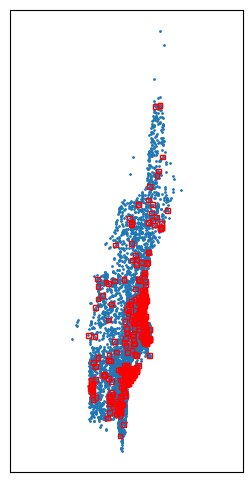

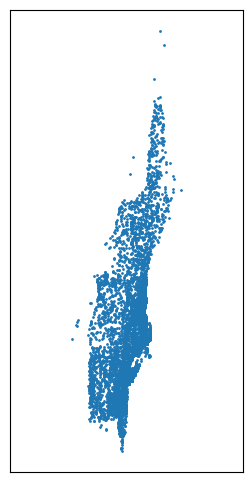

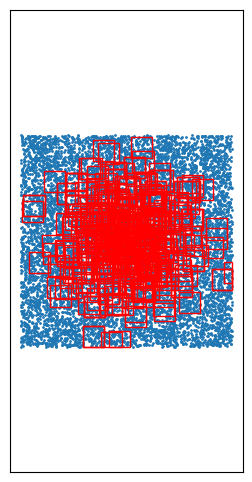

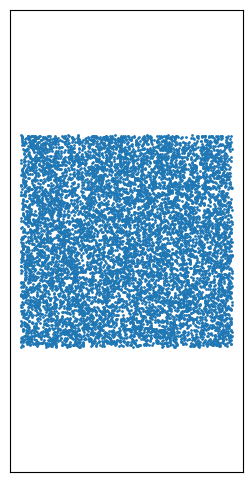

In [45]:
files = [
    {'data':'../data/real/dataset/OSM_10000.csv', 'query':'../data/real/query/OSM_10000_range_1000_2_uniform_1_0.01x0.01.csv',
    'output':'../figs/data/OSM_10000.pdf'},
    {'data':'../data/real/dataset/OSM_10000.csv', 'query':'',
    'output':'../figs/data/OSM_10000.pdf'},
    {'data':'../data/synthetic/dataset/data_10000_2_uniform_1.csv', 'query':'../data/synthetic/query/range_1000_2_normal_1_0.1x0.1.csv',
    'output':'../figs/data/data_10000_2_uniform_1.pdf'},
    {'data':'../data/synthetic/dataset/data_10000_2_uniform_1.csv', 'query':'',
    'output':'../figs/data/data_10000_2_uniform_1.pdf'},
]

for filemap in files:
    plot_data(filemap['data'], filemap['query'], filemap['output'])